Dataset: DOTA 2 Game Outcome Prediction 
*Clasificación Binaria con Regresión Logística*: 


Este trabajo tiene como objetivo predecir el resultado de una partida de DOTA 2 utilizando técnicas de Machine Learning.
Dado que el resultado es binario (Radiant gana vs Dire gana), se elige como primer modelo la Regresión Logística,
una técnica clásica y eficaz para clasificación binaria, que además permite interpretar probabilidades.

In [56]:
# --- 1. Importación de librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss



In [57]:
# --- 2. Cargamos nuestro dataset de train y test ---
train_df = pd.read_csv('D:/Univerisidad/7mo semestre/SIS420 LABS/1erPARCIAL/dota2Train.csv', header=None)
test_df = pd.read_csv('D:/Univerisidad/7mo semestre/SIS420 LABS/1erPARCIAL/dota2Test.csv', header=None)
print("Filas en el dataset de entrenamiento:", train_df.shape[0])
print("Filas en el dataset de prueba:", test_df.shape[0])

# Mostrar primeras filas del dataset de entrenamiento y prueba
print("Primeras filas del dataset de entrenamiento:")
print(train_df.head())

print("Primeras filas del dataset de test:")
print(test_df.head())

Filas en el dataset de entrenamiento: 92650
Filas en el dataset de prueba: 10294
Primeras filas del dataset de entrenamiento:
   0    1    2    3    4    5    6    7    8    9    ...  107  108  109  110  \
0   -1  223    2    2    0    0    0    0    0    0  ...    0    0    0    0   
1    1  152    2    2    0    0    0    1    0   -1  ...    0    0    0    0   
2    1  131    2    2    0    0    0    1    0   -1  ...    0    0    0    0   
3    1  154    2    2    0    0    0    0    0    0  ...   -1    0    0    0   
4   -1  171    2    3    0    0    0    0    0   -1  ...    0    0    0    0   

   111  112  113  114  115  116  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 117 columns]
Primeras filas del dataset de test:
   0    1    2    3    4    5    6    7    8    9    ...  107  108  109  110  \
0   -1  223    8    2    0   -1    0    0    0   

In [58]:
# --- 3. Separar X (características) y Y (etiquetas) ---
y_train = train_df.iloc[:, 0].replace(-1, 0)  # Convertimos -1 a 0 para usar como clase binaria
y_test = test_df.iloc[:, 0].replace(-1, 0)
X_train = train_df.iloc[:, 1:]
X_test = test_df.iloc[:, 1:]



Normalización de características

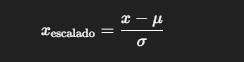

In [59]:
#4 Normalizamos los datos
scaler = StandardScaler() #Normalizamos los datos para que tengan media 0 y varianza 1
X_train_scaled = scaler.fit_transform(X_train) #se calcula la media y desviacion con .fit_transform
X_test_scaled = scaler.transform(X_test)

In [ ]:

from sklearn.model_selection import GridSearchCV #herramienta para la busqueda de hiperparametros

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs'],
    'max_iter': [500, 1000]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

best_logreg = grid.best_estimator_


In [62]:
# --- 5. Definición e implementación del modelo ---
best_logreg.fit(X_train_scaled, y_train)


LogisticRegression(C=0.01, max_iter=500)

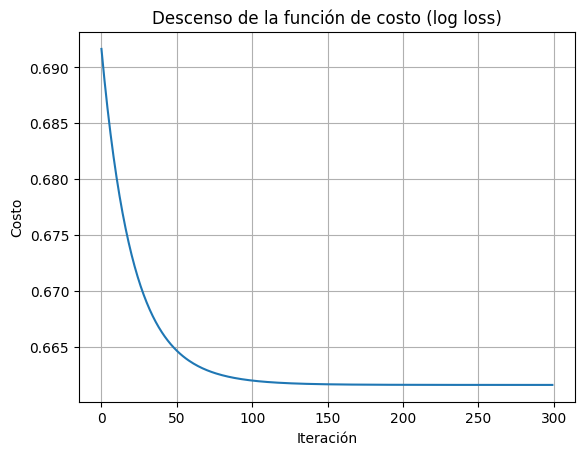

Theta calculado manualmente:
 [[ 0.11250473]
 [-0.00100516]
 [ 0.0010587 ]
 [-0.00551533]
 [-0.04824744]]


In [63]:
# --- Implementación manual del descenso por gradiente con DOTA2 ---

# 1. Añadir columna de 1s para el sesgo (bias)
X_train_manual = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]  # (m, n+1)
y_train_manual = y_train.to_numpy().reshape(-1, 1)

# 2. Función sigmoide (ya la tienes)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 3. Función de costo (log loss)
def calcularCosto(theta, X, y):
    m = y.shape[0]
    h = sigmoid(X.dot(theta))
    return -1/m * np.sum(y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-8))  # pequeño valor para evitar log(0)

# 4. Descenso por gradiente
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta = theta - (alpha / m) * X.T.dot(h - y)
        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history

# 5. Ejecutar descenso por gradiente
alpha = 0.1
num_iters = 300
theta_init = np.zeros((X_train_manual.shape[1], 1))  # vector columna (n+1, 1)
theta_final, J_history = descensoGradiente(theta_init, X_train_manual, y_train_manual, alpha, num_iters)

# 6. Graficar el descenso de la función de costo
plt.plot(range(num_iters), J_history)
plt.title("Descenso de la función de costo (log loss)")
plt.xlabel("Iteración")
plt.ylabel("Costo")
plt.grid(True)
plt.show()

# 7. Mostrar los theta aprendidos
print("Theta calculado manualmente:\n", theta_final[:5])  # mostrar primeros 5 coeficientes


In [64]:
# --- 6. Evaluación del modelo ---
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)
y_prob_test = logreg.predict_proba(X_test_scaled)

In [44]:
# Precisión
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)


In [45]:
# Pérdida logarítmica (función de costo)
loss_test = log_loss(y_test, y_prob_test)
#graficar la funcion de costo
plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [46]:
# --- 7. Métricas y matriz de confusión ---
cm = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

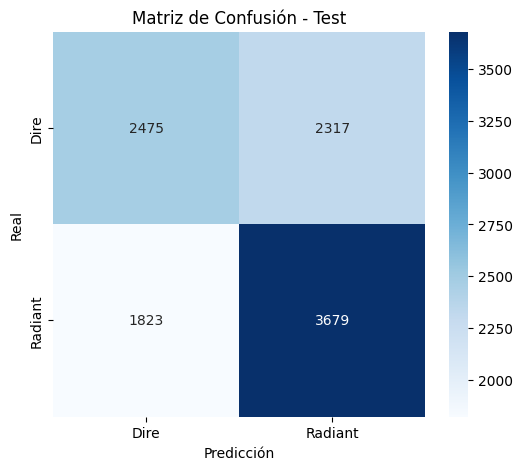

In [47]:
# --- 8. Gráficas ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dire', 'Radiant'], yticklabels=['Dire', 'Radiant'])
plt.title('Matriz de Confusión - Test')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


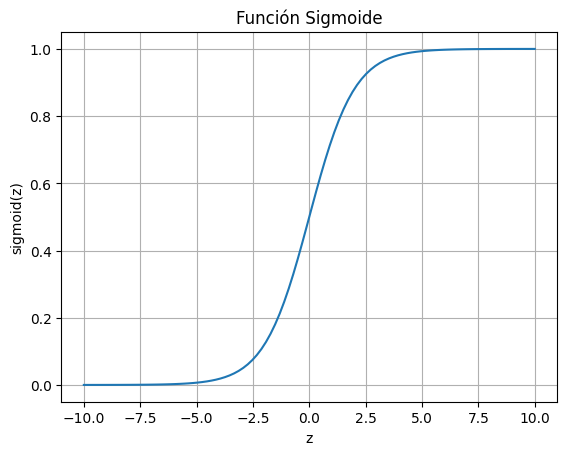

In [48]:
# --- 9. Interpretación de la función sigmoide ---
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.figure()
plt.plot(z, sigmoid(z))
plt.title('Función Sigmoide')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.show()

In [49]:
# --- 10. Resultados ---
print("Precisión en entrenamiento:", round(acc_train, 4))
print("Precisión en prueba:", round(acc_test, 4))
print("Pérdida logarítmica en test:", round(loss_test, 4))
print("\nReporte de clasificación (Test):\n", report)

Precisión en entrenamiento: 0.6009
Precisión en prueba: 0.5978
Pérdida logarítmica en test: 0.6618

Reporte de clasificación (Test):
               precision    recall  f1-score   support

           0       0.58      0.52      0.54      4792
           1       0.61      0.67      0.64      5502

    accuracy                           0.60     10294
   macro avg       0.59      0.59      0.59     10294
weighted avg       0.60      0.60      0.60     10294

